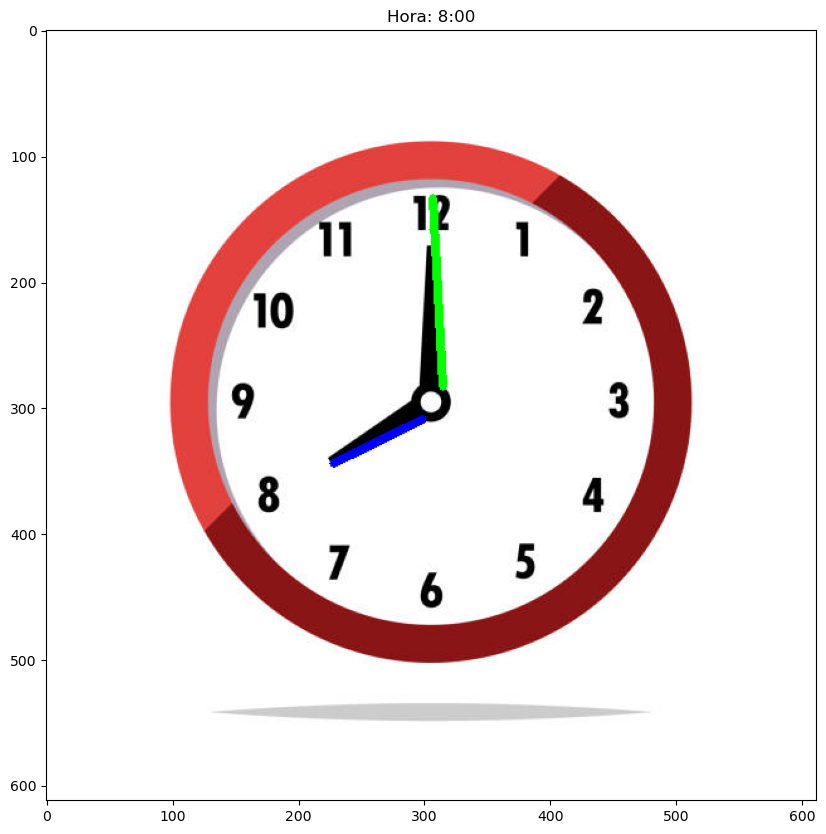

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


imagen_bgr = cv2.imread('RELOJ.jpeg')
imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)

gris = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2GRAY)
gris = cv2.GaussianBlur(gris, (5, 5), 1)
gris = cv2.equalizeHist(gris)


bordes = cv2.Canny(gris, 50, 150)

# Detección de líneas
lineas = cv2.HoughLinesP(bordes, 1, np.pi/180, threshold=80, minLineLength=50, maxLineGap=10)


centro_x = imagen_bgr.shape[1] // 2
centro_y = imagen_bgr.shape[0] // 2

def calcular_angulo(x1, y1, x2, y2):
    dist1 = np.hypot(x1 - centro_x, y1 - centro_y)
    dist2 = np.hypot(x2 - centro_x, y2 - centro_y)
    if dist1 > dist2:
        dx = x1 - centro_x
        dy = centro_y - y1
    else:
        dx = x2 - centro_x
        dy = centro_y - y2
    angulo = np.degrees(np.arctan2(dy, dx))
    angulo = (90 - angulo) % 360
    return angulo

manecillas = []
if lineas is not None:
    for linea in lineas:
        x1, y1, x2, y2 = linea[0]
        longitud = np.hypot(x2 - x1, y2 - y1)
        distancia_centro = min(np.hypot(x1 - centro_x, y1 - centro_y),np.hypot(x2 - centro_x, y2 - centro_y))
        # LINEAS CENTRO
        if distancia_centro < 100 and 40 < longitud < 300:
            angulo = calcular_angulo(x1, y1, x2, y2)
            manecillas.append({
                'puntos': (x1, y1, x2, y2),
                'longitud': longitud,
                'angulo': angulo
            })

if len(manecillas) >= 2:
    # CORTO LARGO
    manecillas.sort(key=lambda x: x['longitud'])
    horario = manecillas[0]
    minutero = manecillas[-1]
    
    hora = int((horario['angulo'] / 30) % 12)
    minutos = int((minutero['angulo'] / 6) % 60)

    fraccion_hora = (horario['angulo'] / 30) % 12
    if abs(fraccion_hora - hora) > 0.5:
        hora = (hora + 1) % 12

    imagen_resultado = imagen_rgb.copy()
   # cv2.circle(imagen_resultado, (centro_x, centro_y), 5, (0, 0, 255), -1)
    cv2.line(imagen_resultado,(horario['puntos'][0], horario['puntos'][1]),(horario['puntos'][2], horario['puntos'][3]), (0, 0, 255), 5)  # horario azul
    cv2.line(imagen_resultado,(minutero['puntos'][0], minutero['puntos'][1]),(minutero['puntos'][2], minutero['puntos'][3]),(0, 255, 0), 5)  # minutero verde

    plt.figure(figsize=(10, 10))
    plt.imshow(imagen_resultado)
    plt.title(f'Hora: {hora}:{minutos:02d}')
    plt.show()



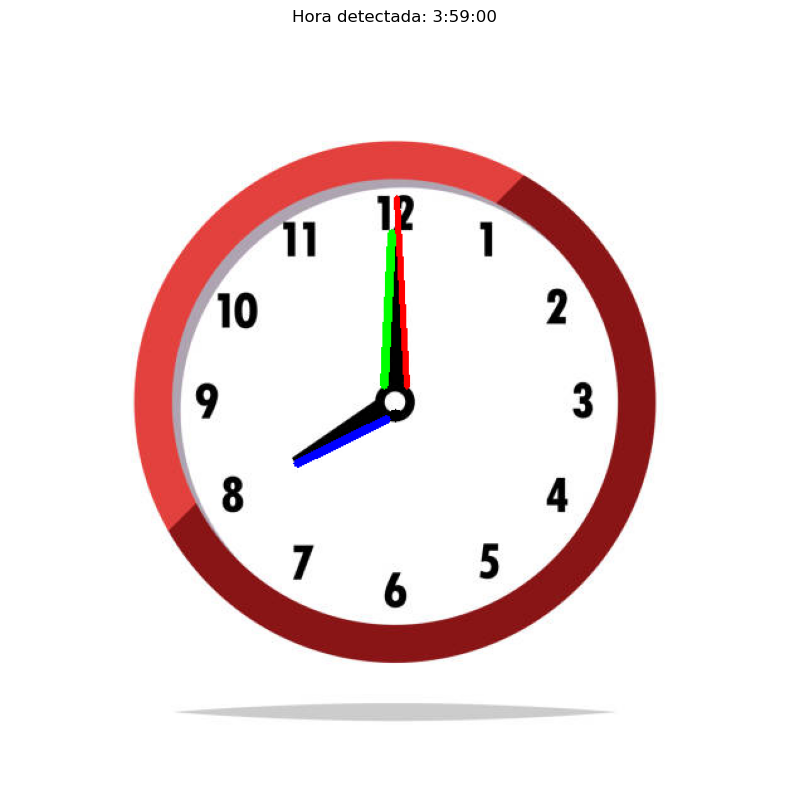

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Leer la imagen
imagen_bgr = cv2.imread('RELOJ.jpeg')
imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)

# Preprocesamiento
gris = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2GRAY)
gris = cv2.GaussianBlur(gris, (5, 5), 1)
gris = cv2.equalizeHist(gris)

# Detección de bordes
bordes = cv2.Canny(gris, 50, 150)

# Detección de líneas
lineas = cv2.HoughLinesP(bordes, 1, np.pi/180, threshold=80, minLineLength=50, maxLineGap=10)

# Centro de la imagen
centro_x = imagen_bgr.shape[1] // 2
centro_y = imagen_bgr.shape[0] // 2

# Función para calcular el ángulo de una línea respecto al centro
def calcular_angulo(x1, y1, x2, y2):
    dist1 = np.hypot(x1 - centro_x, y1 - centro_y)
    dist2 = np.hypot(x2 - centro_x, y2 - centro_y)
    if dist1 > dist2:
        dx = x1 - centro_x
        dy = centro_y - y1
    else:
        dx = x2 - centro_x
        dy = centro_y - y2
    angulo = np.degrees(np.arctan2(dy, dx))
    angulo = (90 - angulo) % 360
    return angulo

# Filtrar manecillas
manecillas = []
if lineas is not None:
    for linea in lineas:
        x1, y1, x2, y2 = linea[0]
        longitud = np.hypot(x2 - x1, y2 - y1)
        distancia_p1 = np.hypot(x1 - centro_x, y1 - centro_y)
        distancia_p2 = np.hypot(x2 - centro_x, y2 - centro_y)
        
        distancia_centro = min(distancia_p1, distancia_p2)
        
        # Solo consideramos líneas que pasan cerca del centro
        if distancia_centro < 30 and 40 < longitud < 400:
            angulo = calcular_angulo(x1, y1, x2, y2)
            manecillas.append({
                'puntos': (x1, y1, x2, y2),
                'longitud': longitud,
                'angulo': angulo,
                'distancia_centro': distancia_centro
            })

# Asignar manecillas
if len(manecillas) >= 3:
    # Ordenar por longitud
    manecillas.sort(key=lambda x: x['longitud'])
    horario = manecillas[0]    # más corto
    minutero = manecillas[2]   # medio
    segundero = manecillas[3]  # más largo (puede variar, depende de tu reloj)

    # Calcular hora, minutos y segundos
    hora = int((horario['angulo'] / 30) % 12)
    minutos = int((minutero['angulo'] / 6) % 60)
    segundos = int((segundero['angulo'] / 6) % 60)  # corregido también

    # Ajustar si es necesario
    fraccion_hora = (horario['angulo'] / 30) % 12
    if abs(fraccion_hora - hora) > 0.5:
        hora = (hora + 1) % 12

    # Dibujar resultado
    imagen_resultado = imagen_rgb.copy()
    cv2.circle(imagen_resultado, (centro_x, centro_y), 5, (0, 0, 0), -1)  # Dibujar el centro
    cv2.line(imagen_resultado, (horario['puntos'][0], horario['puntos'][1]), (horario['puntos'][2], horario['puntos'][3]), (0, 0, 255), 5)  # horario rojo
    cv2.line(imagen_resultado, (minutero['puntos'][0], minutero['puntos'][1]), (minutero['puntos'][2], minutero['puntos'][3]), (0, 255, 0), 5)  # minutero verde
    cv2.line(imagen_resultado, (segundero['puntos'][0], segundero['puntos'][1]), (segundero['puntos'][2], segundero['puntos'][3]), (255, 0, 0), 3)  # segundero azul más delgado

    # Mostrar la imagen
    plt.figure(figsize=(10, 10))
    plt.imshow(imagen_resultado)
    plt.title(f'Hora detectada: {hora}:{minutos:02d}:{segundos:02d}')
    plt.axis('off')
    plt.show()


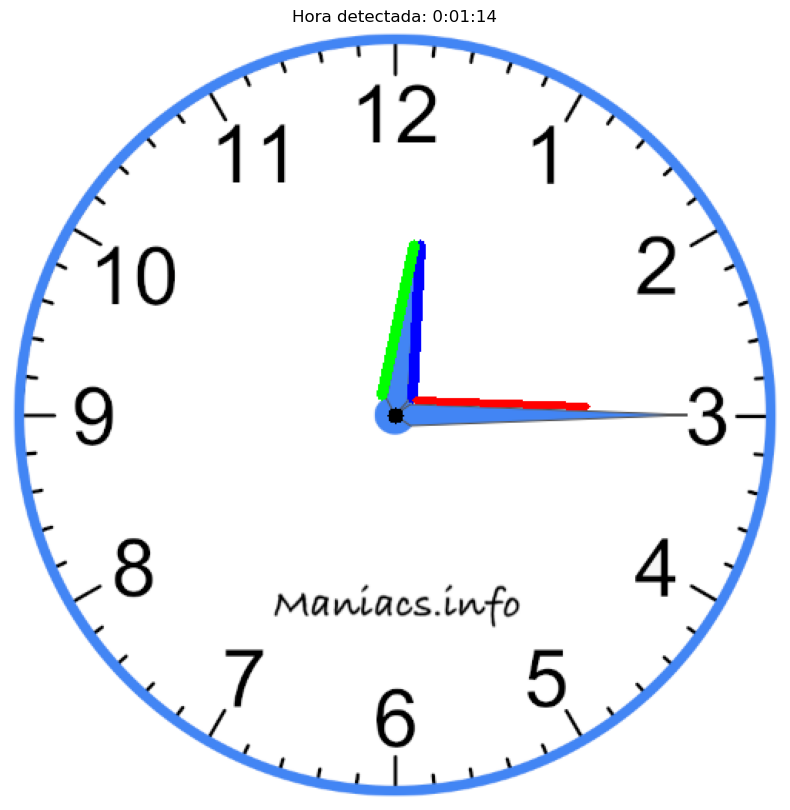

In [28]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Leer la imagen
imagen_bgr = cv2.imread('clock.png')
imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)

# Preprocesamiento
gris = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2GRAY)
gris = cv2.GaussianBlur(gris, (5, 5), 1)
gris = cv2.equalizeHist(gris)

# Detección de bordes
bordes = cv2.Canny(gris, 50, 150)

# Detección de líneas
lineas = cv2.HoughLinesP(bordes, 1, np.pi/180, threshold=80, minLineLength=50, maxLineGap=10)

# Centro de la imagen
centro_x = imagen_bgr.shape[1] // 2
centro_y = imagen_bgr.shape[0] // 2

# Función para calcular el ángulo de una línea respecto al centro
def calcular_angulo(x1, y1, x2, y2):
    dist1 = np.hypot(x1 - centro_x, y1 - centro_y)
    dist2 = np.hypot(x2 - centro_x, y2 - centro_y)
    if dist1 > dist2:
        dx = x1 - centro_x
        dy = centro_y - y1
    else:
        dx = x2 - centro_x
        dy = centro_y - y2
    angulo = np.degrees(np.arctan2(dy, dx))
    angulo = (90 - angulo) % 360
    return angulo

# Filtrar manecillas
manecillas = []
if lineas is not None:
    for linea in lineas:
        x1, y1, x2, y2 = linea[0]
        longitud = np.hypot(x2 - x1, y2 - y1)
        distancia_p1 = np.hypot(x1 - centro_x, y1 - centro_y)
        distancia_p2 = np.hypot(x2 - centro_x, y2 - centro_y)
        
        distancia_centro = min(distancia_p1, distancia_p2)
        
        # Solo consideramos líneas que pasan cerca del centro
        if distancia_centro < 30 and 40 < longitud < 400:
            angulo = calcular_angulo(x1, y1, x2, y2)
            manecillas.append({
                'puntos': (x1, y1, x2, y2),
                'longitud': longitud,
                'angulo': angulo,
                'distancia_centro': distancia_centro
            })

# Asignar manecillas
if len(manecillas) >= 3:
    # Ordenar por longitud (de menor a mayor)
    manecillas.sort(key=lambda x: x['longitud'])

    horario = manecillas[0]    # más corto = hora
    minutero = manecillas[1]   # medio = minutos
    segundero = manecillas[2]  # más largo = segundos

    # Calcular hora, minutos y segundos
    hora = int((horario['angulo'] / 30) % 12)
    minutos = int((minutero['angulo'] / 6) % 60)
    segundos = int((segundero['angulo'] / 6) % 60)

    # Ajuste de la hora si es necesario
    fraccion_hora = (horario['angulo'] / 30)
    if abs(fraccion_hora - hora) > 0.5:
        hora = (hora + 1) % 12

    # Dibujar resultado
    imagen_resultado = imagen_rgb.copy()
    cv2.circle(imagen_resultado, (centro_x, centro_y), 5, (0, 0, 0), -1)  # Dibujar el centro
    cv2.line(imagen_resultado, (horario['puntos'][0], horario['puntos'][1]), (horario['puntos'][2], horario['puntos'][3]), (0, 0, 255), 5)  # Azul para hora
    cv2.line(imagen_resultado, (minutero['puntos'][0], minutero['puntos'][1]), (minutero['puntos'][2], minutero['puntos'][3]), (0, 255, 0), 5)  # Verde para minutos
    cv2.line(imagen_resultado, (segundero['puntos'][0], segundero['puntos'][1]), (segundero['puntos'][2], segundero['puntos'][3]), (255, 0, 0), 3)  # Rojo para segundos

    # Mostrar la imagen
    plt.figure(figsize=(10, 10))
    plt.imshow(imagen_resultado)
    plt.title(f'Hora detectada: {hora}:{minutos:02d}:{segundos:02d}')
    plt.axis('off')
    plt.show()


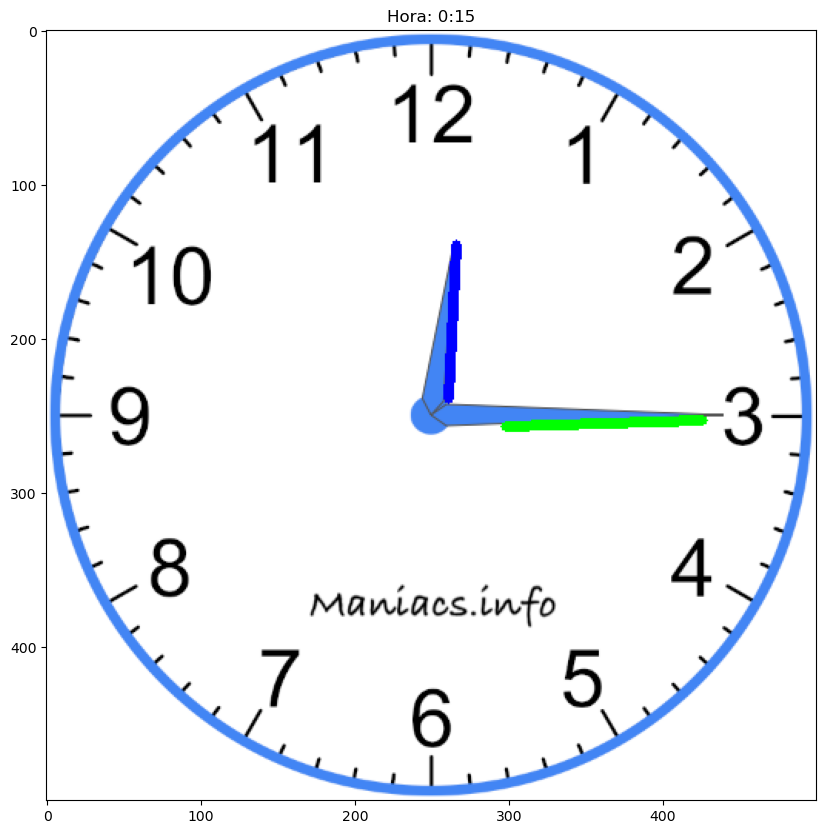

In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


imagen_bgr = cv2.imread('clock.png')
imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)

gris = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2GRAY)
gris = cv2.GaussianBlur(gris, (5, 5), 1)
gris = cv2.equalizeHist(gris)


bordes = cv2.Canny(gris, 50, 150)

# Detección de líneas
lineas = cv2.HoughLinesP(bordes, 1, np.pi/180, threshold=80, minLineLength=50, maxLineGap=10)


centro_x = imagen_bgr.shape[1] // 2
centro_y = imagen_bgr.shape[0] // 2

def calcular_angulo(x1, y1, x2, y2):
    dist1 = np.hypot(x1 - centro_x, y1 - centro_y)
    dist2 = np.hypot(x2 - centro_x, y2 - centro_y)
    if dist1 > dist2:
        dx = x1 - centro_x
        dy = centro_y - y1
    else:
        dx = x2 - centro_x
        dy = centro_y - y2
    angulo = np.degrees(np.arctan2(dy, dx))
    angulo = (90 - angulo) % 360
    return angulo

manecillas = []
if lineas is not None:
    for linea in lineas:
        x1, y1, x2, y2 = linea[0]
        longitud = np.hypot(x2 - x1, y2 - y1)
        distancia_centro = min(np.hypot(x1 - centro_x, y1 - centro_y),np.hypot(x2 - centro_x, y2 - centro_y))
        # LINEAS CENTRO
        if distancia_centro < 100 and 40 < longitud < 300:
            angulo = calcular_angulo(x1, y1, x2, y2)
            manecillas.append({
                'puntos': (x1, y1, x2, y2),
                'longitud': longitud,
                'angulo': angulo
            })

if len(manecillas) >= 2:
    # CORTO LARGO
    manecillas.sort(key=lambda x: x['longitud'])
    horario = manecillas[0]
    minutero = manecillas[-1]
    
    hora = int((horario['angulo'] / 30) % 12)
    minutos = int((minutero['angulo'] / 6) % 60)

    fraccion_hora = (horario['angulo'] / 30) % 12
    if abs(fraccion_hora - hora) > 0.5:
        hora = (hora + 1) % 12

    imagen_resultado = imagen_rgb.copy()
   # cv2.circle(imagen_resultado, (centro_x, centro_y), 5, (0, 0, 255), -1)
    cv2.line(imagen_resultado,(horario['puntos'][0], horario['puntos'][1]),(horario['puntos'][2], horario['puntos'][3]), (0, 0, 255), 5)  # horario azul
    cv2.line(imagen_resultado,(minutero['puntos'][0], minutero['puntos'][1]),(minutero['puntos'][2], minutero['puntos'][3]),(0, 255, 0), 5)  # minutero verde

    plt.figure(figsize=(10, 10))
    plt.imshow(imagen_resultado)
    plt.title(f'Hora: {hora}:{minutos:02d}')
    plt.show()
